In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from gensim.models import Word2Vec, FastText

In [2]:
# Load the dataset
data = pd.read_csv('/content/train.csv')  # Replace 'customer_review.csv' with your dataset file

In [3]:
# Convert labels to the appropriate data type
data['label'] = data['label'].astype(int)

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['tweet'], data['label'], test_size=0.2, random_state=42)

In [5]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [6]:
# Pad sequences to ensure consistent length
max_sequence_length = max([len(sequence) for sequence in X_train_sequences])
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

In [7]:
# Word Embedding - Word2Vec
word2vec_model = Word2Vec(sentences=X_train_sequences, vector_size=100, min_count=1)
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv.key_to_index:
        embedding_matrix[i] = word2vec_model.wv[word]

In [8]:
# Word Embedding - FastText
fasttext_model = FastText(sentences=X_train_sequences, vector_size=100, min_count=1)
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    if word in fasttext_model.wv.key_to_index:
        embedding_matrix[i] = fasttext_model.wv[word]

In [9]:
# Define the BI-LSTM model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# Train the model
model.fit(X_train_padded, y_train.astype(float), validation_data=(X_test_padded, y_test.astype(float)), epochs=10, batch_size=64)

Epoch 1/10
400/400 [==============================] - 45s 102ms/step - loss: 0.2682 - accuracy: 0.9301 - val_loss: 0.2571 - val_accuracy: 0.9287
Epoch 2/10
400/400 [==============================] - 41s 102ms/step - loss: 0.2544 - accuracy: 0.9301 - val_loss: 0.2573 - val_accuracy: 0.9287
Epoch 3/10
400/400 [==============================] - 39s 98ms/step - loss: 0.2545 - accuracy: 0.9301 - val_loss: 0.2575 - val_accuracy: 0.9287
Epoch 4/10
400/400 [==============================] - 40s 99ms/step - loss: 0.2539 - accuracy: 0.9301 - val_loss: 0.2578 - val_accuracy: 0.9287
Epoch 5/10
400/400 [==============================] - 41s 102ms/step - loss: 0.2539 - accuracy: 0.9301 - val_loss: 0.2573 - val_accuracy: 0.9287
Epoch 6/10
400/400 [==============================] - 41s 101ms/step - loss: 0.2541 - accuracy: 0.9301 - val_loss: 0.2573 - val_accuracy: 0.9287
Epoch 7/10
400/400 [==============================] - 40s 100ms/step - loss: 0.2538 - accuracy: 0.9301 - val_loss: 0.2571 - val_accu

In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test.astype(float), verbose=0)
print("Accuracy:", accuracy)

Accuracy: 0.9286719560623169


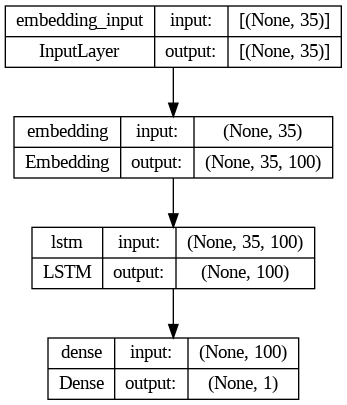

In [15]:
#plot
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)